Objective: build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.


The SVM algorithm: SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt



In [2]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-05-03 17:35:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.02s   

2020-05-03 17:35:19 (934 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [3]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cell_df.shape

(699, 11)

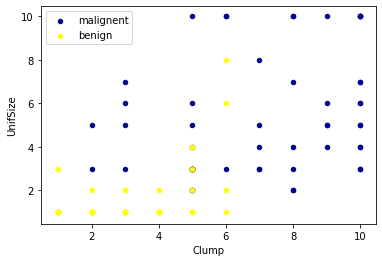

In [5]:
ax = cell_df[cell_df['Class'] ==4][0:50].plot(kind='scatter', x= 'Clump',y ='UnifSize', color = 'DarkBlue',label = 'malignent');
cell_df[cell_df['Class']==2][0:50].plot(kind = 'scatter', x = 'Clump', y ='UnifSize', color = 'Yellow', label = 'benign', ax = ax)
plt.show()

In [6]:
#Data pre-processing and selection:
#look at columns data types:

cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
#BareNuc column includes values that are not numerical. Drop those rows 
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
feature_df = cell_df[['Clump', 'UnifSize','UnifShape','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  2,  1,  3,  1,  1]])

In [15]:
#want the model to predict the value of Class (that is, benign =2, or malignant = 4. as this field can have one of only two possible values, we need to change its measurement level to reflect this)

cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [17]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (546, 8) (546,)
Test set:  (137, 8) (137,)


In [19]:
#Modling (SVM with Scikit-learn)
from sklearn import svm
clf = svm.SVC(kernel = 'rbf') #radial Basis Function
clf.fit(X_train, y_train)

/Users/annajoen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
#After being fitted, the model can then be used to predict new values:

yhat = clf.predict(X_test)
yhat[0:5]



array([2, 4, 2, 4, 2])

In [21]:
#Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [27]:
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title ='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation =45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i , format(cm[i, j], fmt),
                horizontalalignment = "center",
                color = "white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


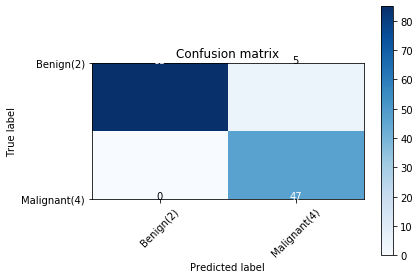

In [28]:
#compute confusion matrix: 
cnf_matrix = confusion_matrix(y_test, yhat, labels = [2,4])
np.set_printoptions(precision = 2)

print(classification_report(y_test, yhat)) 

#plor non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Benign(2)', 'Malignant(4)'], normalize = False, title = 'Confusion matrix')


In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average = 'weighted')

0.9639038982104676

In [30]:
#Lets try jaccard index for accuracy:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/annajoen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9635036496350365

In [31]:
#rebuild the model using "linear kernel"
clf2 = svm.SVC(kernel = 'linear') 
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)

print("Avg F1_score: %.4f" % f1_score(y_test, yhat2, average = 'weighted'))
print('Jaccard score: %.4f' % jaccard_similarity_score(y_test, yhat2))

Avg F1_score: 0.9711
Jaccard score: 0.9708


/Users/annajoen/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
